In [4]:
import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isna().any().sum()

0

In [8]:
df.duplicated().sum()

0

In [9]:
import matplotlib.pyplot as plt
import seaborn as sb

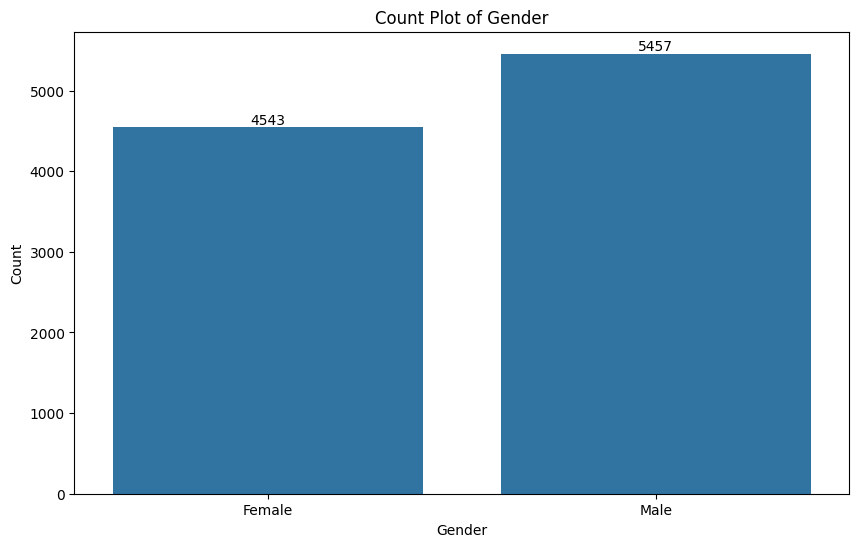

In [10]:
plt.figure(figsize=(10, 6))
ax = sb.countplot(x='Gender', data=df)
for bars in ax.containers: # to display the no above the bars
    ax.bar_label(bars)
plt.title('Count Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [11]:
df1 = df.groupby('EstimatedSalary')[['Gender', 'Age']].sum()
df2 = pd.DataFrame(df1)
df3=df2.reset_index()

In [12]:
df3.columns

Index(['EstimatedSalary', 'Gender', 'Age'], dtype='object')

In [13]:
#plotting the bar graph using pandas
# x=df3['Gender']
# y=df3['Age']
# h=df3['EstimatedSalary']
# plt.figure(figsize=(10, 6))
# df3.plot(kind='bar', x='Gender', y='Age', legend=False, color=['blue', 'red'])
# plt.show()

In [14]:
df=df.drop(['Surname','CustomerId','RowNumber'], axis=1)

In [15]:
data = pd.get_dummies(df, drop_first=True) # to remove collinearity
data.head()
data.columns
data.shape

(10000, 12)

In [16]:
y=data['Exited']
y.value_counts()
y=pd.DataFrame(y)
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [17]:
x=data.drop('Exited', axis=1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


# Handling unbalanced dataset with SMOT

In [18]:
!pip install imblearn

# Data Balancing

In [19]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(x,y)
y_res.value_counts()

Exited
0         7963
1         7963
Name: count, dtype: int64

In [20]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split #importing the module

x_train, x_test, y_train, y_test = train_test_split(X_res,y_res, test_size = 0.25, random_state = 42) #splitting

In [21]:
y_train

,Exited
13882,1
2727,0
3964,1
6896,0
10783,1
...,...
13418,1
5390,1
860,1
15795,1


In [22]:
from sklearn.preprocessing import StandardScaler # normalization

sc=StandardScaler()

X_train = sc.fit_transform(x_train)

X_test = sc.fit_transform(x_test)

In [23]:
model = LogisticRegression() # creating the model
model.fit(X_train, y_train) # fitting the model

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [24]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [25]:

# import numpy as np
# actual_values = np.array(y_test)
# predicted_values = np.array(y_pred)
# sq_err = (actual_values - predicted_values)**2
# mse = np.mean(sq_err)
# rmse = np.sqrt(mse)
# print("Mean Squared Error (MSE):", mse)
# print("Root Mean Squared Error (RMSE):", rmse)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1562,  474],
       [ 391, 1555]], dtype=int64)

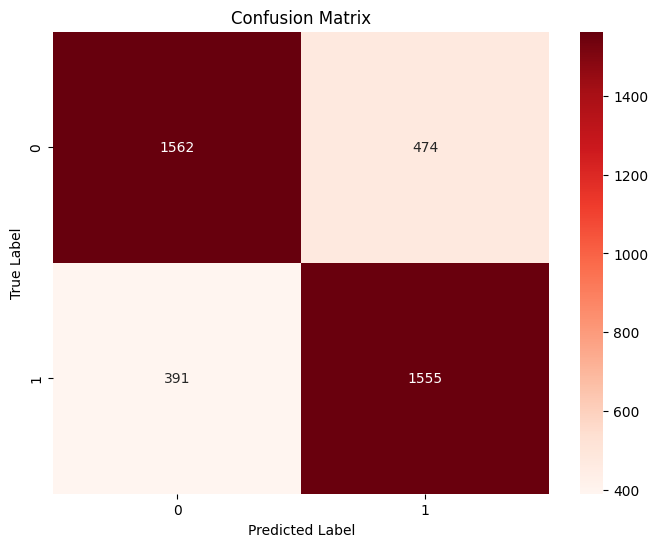

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [28]:
from sklearn.metrics import accuracy_score, f1_score

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.7827724761426419
F1 Score: 0.7827804357164612


In [30]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
# Train SVR model
svm_model.fit(x_train, y_train)

# Predict
y_pred_svm = svm_model.predict(x_test)

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
y_pred_svm

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)